# IMPORTS

## Libraries

In [38]:
import pandas as pd
import math
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
from IPython.core.display import HTML

## Helper Functions

In [39]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [40]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## Loading Data

In [41]:
salesRaw = pd.read_csv('../01-Data/train.csv', low_memory=False)
storeRaw = pd.read_csv('../01-Data/store.csv', low_memory=False)

### Merge Datasets

In [42]:
dfRaw = salesRaw.merge(storeRaw, how='left', on='Store')

# DESCRIPTION OF THE DATA

## Columns

In [43]:
dfRaw1 = dfRaw.copy()

In [44]:
dfRaw1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## Data Dimensions

In [45]:
print(f'Number of Rows: {dfRaw1.shape[0]}')
print(f'Number of Columns: {dfRaw1.shape[1]}')

Number of Rows: 1017209
Number of Columns: 18


## Data Types

In [46]:
dfRaw1.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [47]:
dfRaw1['Date'] = pd.to_datetime(dfRaw1['Date'])

## Not a Number

### Sum

In [48]:
dfRaw1.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

### Mean

In [49]:
dfRaw1.isnull().mean()

Store                        0.000000
DayOfWeek                    0.000000
Date                         0.000000
Sales                        0.000000
Customers                    0.000000
Open                         0.000000
Promo                        0.000000
StateHoliday                 0.000000
SchoolHoliday                0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002597
CompetitionOpenSinceMonth    0.317878
CompetitionOpenSinceYear     0.317878
Promo2                       0.000000
Promo2SinceWeek              0.499436
Promo2SinceYear              0.499436
PromoInterval                0.499436
dtype: float64

## Fillout NA

In [50]:
maxValueCompetitionDistance = dfRaw1['CompetitionDistance'].max()

In [51]:
dfRaw1.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
656683,734,3,2013-11-20,7551,638,1,1,0,0,a,a,220.0,NaN,NaN,1,36.0,2013.0,"Mar,Jun,Sept,Dec"
437263,969,4,2014-06-05,4320,704,1,1,0,0,a,c,600.0,11.0,1999.0,1,10.0,2013.0,"Jan,Apr,Jul,Oct"
530062,108,4,2014-03-13,8446,756,1,0,0,0,d,c,2190.0,9.0,2003.0,0,NaN,NaN,NaN
838427,733,1,2013-06-10,14009,3257,1,0,0,0,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
470275,531,2,2014-05-06,5235,669,1,1,0,0,a,c,4030.0,NaN,NaN,0,NaN,NaN,NaN


In [52]:
# CompetitionDistance
    #distance in meters to the nearest competitor store
#maxValueCompetitionDistance = dfRaw1['CompetitionDistance'].max()
dfRaw1['CompetitionDistance'] = dfRaw1['CompetitionDistance'].apply(lambda row: 200000.0 if math.isnan(row) else row)


# CompetitionOpenSinceMonth
    #gives the approximate month of the time the nearest competitor was opened
dfRaw1['CompetitionOpenSinceMonth'] = dfRaw1.apply(lambda row: row['Date'].month if math.isnan(row['CompetitionOpenSinceMonth']) else row['CompetitionOpenSinceMonth'], axis=1)


# CompetitionOpenSinceYear
    # gives the approximate year of the time the nearest competitor was opened
dfRaw1['CompetitionOpenSinceYear'] = dfRaw1.apply(lambda row: row['Date'].year if math.isnan(row['CompetitionOpenSinceYear']) else row['CompetitionOpenSinceYear'], axis=1)


# Promo2SinceWeek
    #describes the calendar week when the store started participating in Promo2
dfRaw1['Promo2SinceWeek'] = dfRaw1.apply(lambda row: row['Date'].week if math.isnan(row['Promo2SinceWeek']) else row['Promo2SinceWeek'], axis=1)


# Promo2SinceYear
    #describes the year when the store started participating in Promo2
dfRaw1['Promo2SinceYear'] = dfRaw1.apply(lambda row: row['Date'].week if math.isnan(row['Promo2SinceYear']) else row['Promo2SinceYear'], axis=1)


# PromoInterval
    #describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew.\
    #E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store
monthMap = {
                1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
            }

dfRaw1['PromoInterval'].fillna(0, inplace=True)
dfRaw1['MonthMap'] = dfRaw1['Date'].dt.month.map(monthMap)

dfRaw1['IsPromo'] = dfRaw1[['PromoInterval', 'MonthMap']].apply(lambda row: 0 if row['PromoInterval'] == 0 else 1 if row['MonthMap'] in row['PromoInterval'].split(',') else 0, axis=1)

In [53]:
dfRaw1.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
MonthMap                     0
IsPromo                      0
dtype: int64

## Change Types

In [54]:
dfRaw1.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
MonthMap                             object
IsPromo                               int64
dtype: object

In [55]:
# competiton
dfRaw1['CompetitionOpenSinceMonth'] = dfRaw1['CompetitionOpenSinceMonth'].astype(int)
dfRaw1['CompetitionOpenSinceYear'] = dfRaw1['CompetitionOpenSinceYear'].astype(int)

# promo2
dfRaw1['Promo2SinceWeek'] = dfRaw1['Promo2SinceWeek'].astype(int)
dfRaw1['Promo2SinceYear'] = dfRaw1['Promo2SinceYear'].astype(int)

## Descriptive Statistical

In [56]:
numAttributes = dfRaw1.select_dtypes(include=['int64', 'float64'])
catAttributes = dfRaw1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### Numerical Attributes

In [57]:
### Central Tendency -> Mean, Median
ct1 = pd.DataFrame(numAttributes.apply(np.mean)).T
ct2 = pd.DataFrame(numAttributes.apply(np.median)).T

### Dispersion -> std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(numAttributes.apply(np.std)).T
d2 = pd.DataFrame(numAttributes.apply(min)).T
d3 = pd.DataFrame(numAttributes.apply(max)).T
d4 = pd.DataFrame(numAttributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(numAttributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(numAttributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['Attributes', 'Min', 'Max', 'Range', 'Mean', 'Median', 'Std', 'Skew', 'Kurtosis']
m

,Attributes,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,Store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,DayOfWeek,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,Sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,Customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,Open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,Promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,SchoolHoliday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,CompetitionDistance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,Promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,IsPromo,0.0,1.0,1.0,0.165966,0.0,0.372050,1.795644,1.224338


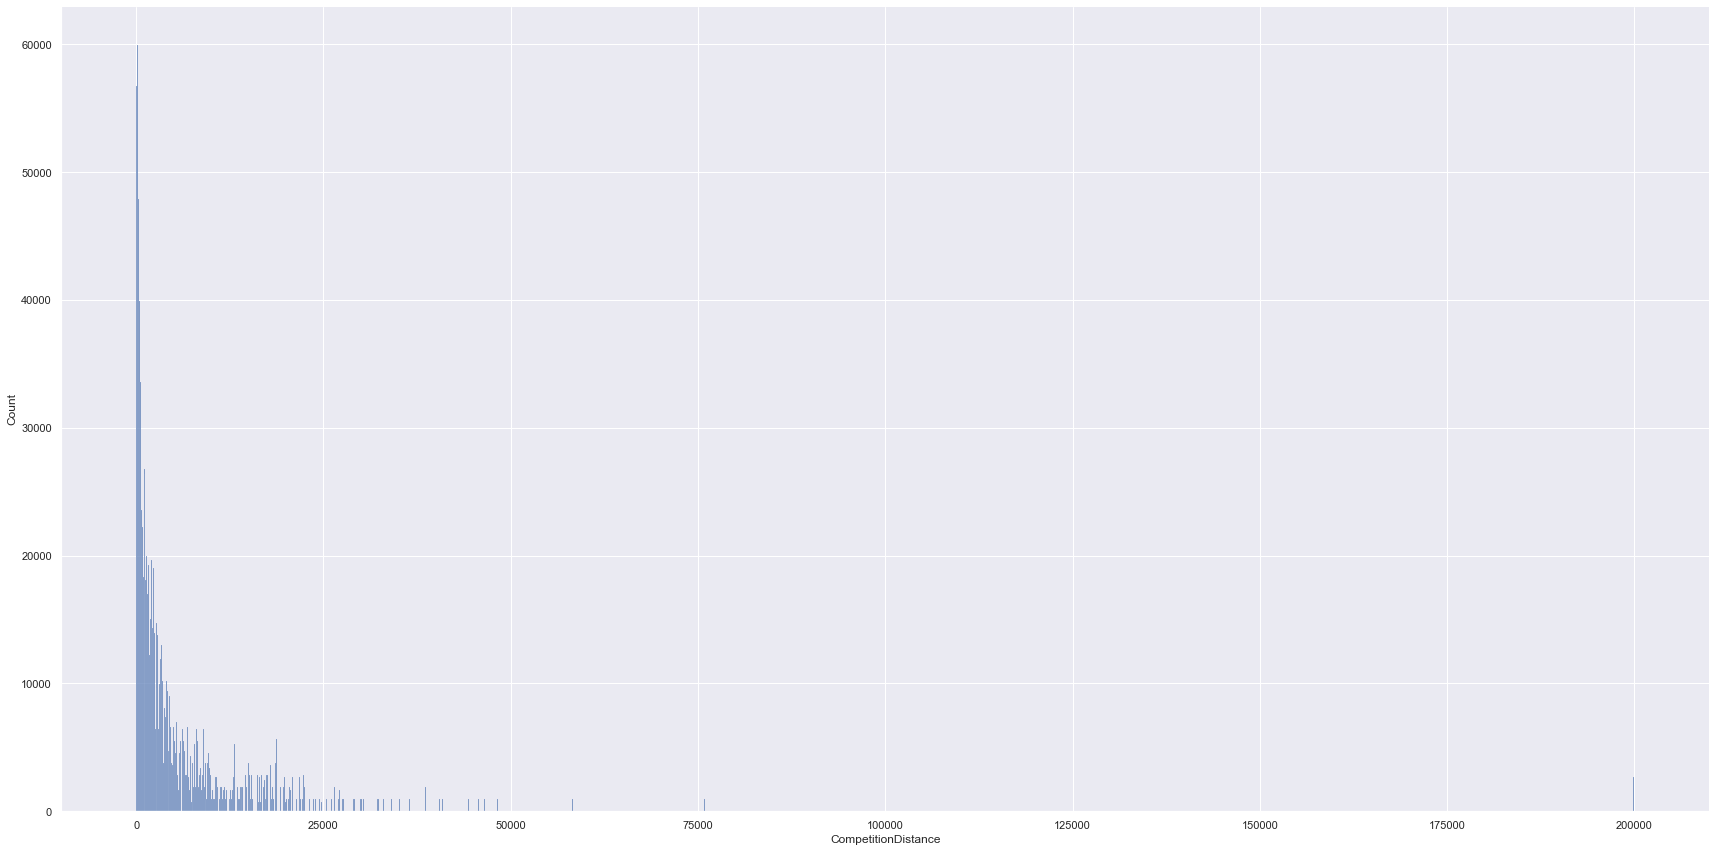

In [61]:
sns.displot(dfRaw1['CompetitionDistance'], kde=False, height=12, aspect=2)

### Categorical Atributes

In [22]:
catAttributes.apply(lambda x: x.unique().shape[0])

StateHoliday                  4
StoreType                     4
Assortment                    3
CompetitionOpenSinceMonth    12
CompetitionOpenSinceYear     23
Promo2SinceWeek              52
Promo2SinceYear              59
PromoInterval                 4
MonthMap                     12
dtype: int64

<AxesSubplot:xlabel='Assortment', ylabel='Sales'>

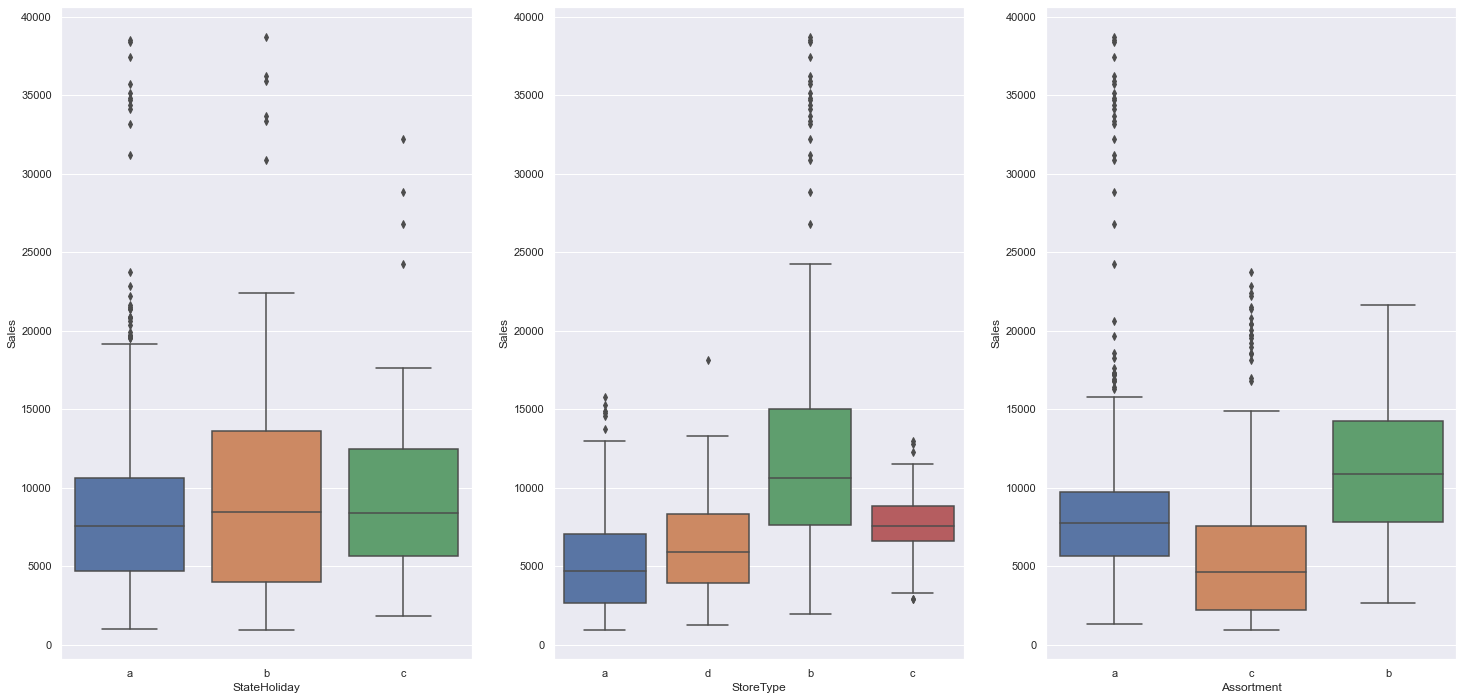

In [23]:
aux = dfRaw1[(dfRaw1['StateHoliday'] != '0') & (dfRaw1['Sales'] > 0)]

plt.subplot( 1, 3, 1 )
sns.boxplot( x='StateHoliday', y='Sales', data=aux )

plt.subplot( 1, 3, 2 )
sns.boxplot( x='StoreType', y='Sales', data=aux )

plt.subplot( 1, 3, 3 )
sns.boxplot( x='Assortment', y='Sales', data=aux )